----

## ANALISIS TIENDA ONLINE ICE

# PASO 1. Archivo de datos e informacion general

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

games = pd.read_csv('/datasets/games.csv')


# PASO 2: Preparar los datos

# 2.1 Remplazar los nombres de las columnas a minúsculas

In [2]:
games.columns = games.columns.str.strip().str.lower()
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# 2.2 Convertir los datos en los tipos necesarios

In [3]:
# Verificar los tipos actuales
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [4]:
# Conversion de year_of_release a entero

games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')

# Conversión de critic_score a numérico
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')

# Conversión de user_score:
# 1) Reemplazar 'tbd' por NaN
# 2) Convertir a tipo numérico (float)
games['user_score'] = games['user_score'].replace('tbd', pd.NA)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

In [5]:
# Confirmación de cambio
games.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

# 2.3 Describir columnas con tipo de dato cambiado

- "year_of_release": se convirtió a entero porque representa un año específico.
- "user_score": contenía valores tipo string como "tbd", por lo que fue necesario reemplazarlos y convertir a float.
- "critic_score": fue convertido a float para realizar análisis numérico correcto.

# 2.4 Manejo de valores ausentes

In [6]:
# Se hace una revisión general de valores faltantes
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Decisiones:

- "year_of_release": se dejarán como `NaN`, ya que no hay forma segura de imputar el año.
- "critic_score" y "user_score": también se dejan como `NaN`, ya que imputar podría sesgar el análisis.
- "user_score": reemplazamos "tbd" con `NaN` porque significa "To Be Determined", es decir, aún no está disponible.

Justificación: dejar los datos en blanco permite usar técnicas como `.dropna()` o análisis parcial sin forzar valores incorrectos.

# 2.5 Calcular las ventas totales y colocarlas en una nueva columna

In [7]:
# Crear columna total_sales
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
games[['name', 'total_sales']].head()

,name,total_sales
0,Wii Sports,82.54
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.52
3,Wii Sports Resort,32.77
4,Pokemon Red/Pokemon Blue,31.38


# PASO 3: Analiza los datos

# 3.1 Número de juegos lanzados por año

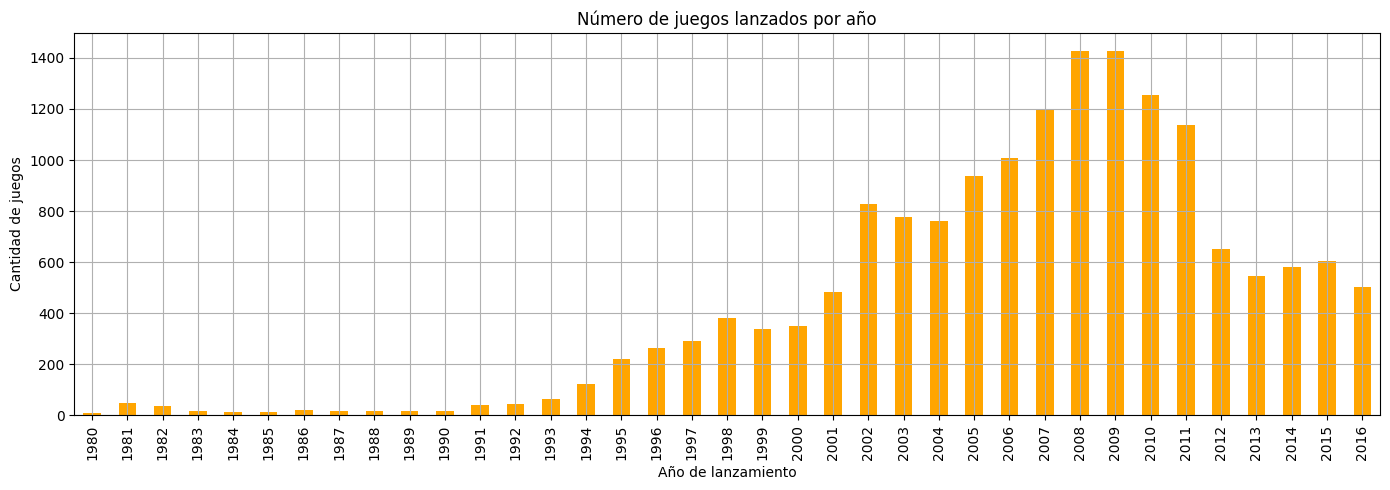

In [8]:
# ¿Cuántos juegos fueron lanzados en diferentes años?
# ¿Son significativos los datos de cada periodo?

games_per_year = games['year_of_release'].value_counts().sort_index()

games_per_year.plot(kind='bar', figsize=(14, 5), color='orange', title='Número de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad de juegos')
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa una tendencia creciente en la industria desde los años 90 hasta alcanzar un pico en 2008-2009, superando los 1400 lanzamientos anuales. A partir de 2010, el número comienza a disminuir de forma sostenida. Este declive podría atribuirse a un mercado más competitivo, costos de desarrollo más altos o una consolidación de títulos exitosos. Además, los datos de 2016 parecen incompletos, por lo que deben considerarse con cautela.

# 3.2 Variación de ventas en plataformas

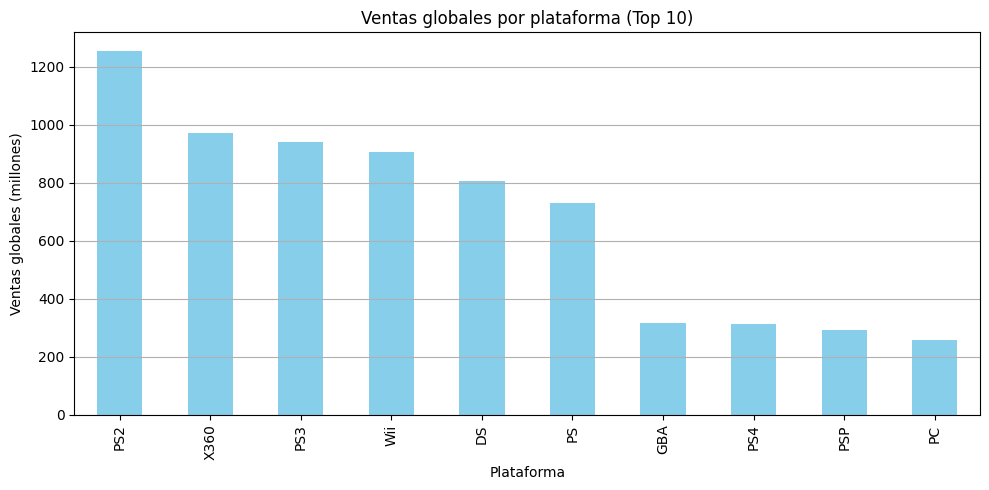

In [9]:
# ¿Cómo varian las ventas de una plataforma a otra?
# ¿Que plataformas fueron populares y luego cayeron?

# Agrupamos por plataforma y sumamos las ventas totales
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
platform_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas globales por plataforma (Top 10)')
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Plataforma')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

La PS2 domina ampliamente el mercado con más de 1200 millones de unidades vendidas, seguida por X360 y PS3, que también muestran un fuerte rendimiento. Consolas como Wii y DS refuerzan el liderazgo de Nintendo en los años analizados. En contraste, plataformas como PC, PSP y GBA, aunque relevantes, muestran cifras notablemente menores, lo que indica una menor penetración de mercado o un ciclo de vida más limitado en el contexto de este análisis.

# 3.3 Lideres de ventas

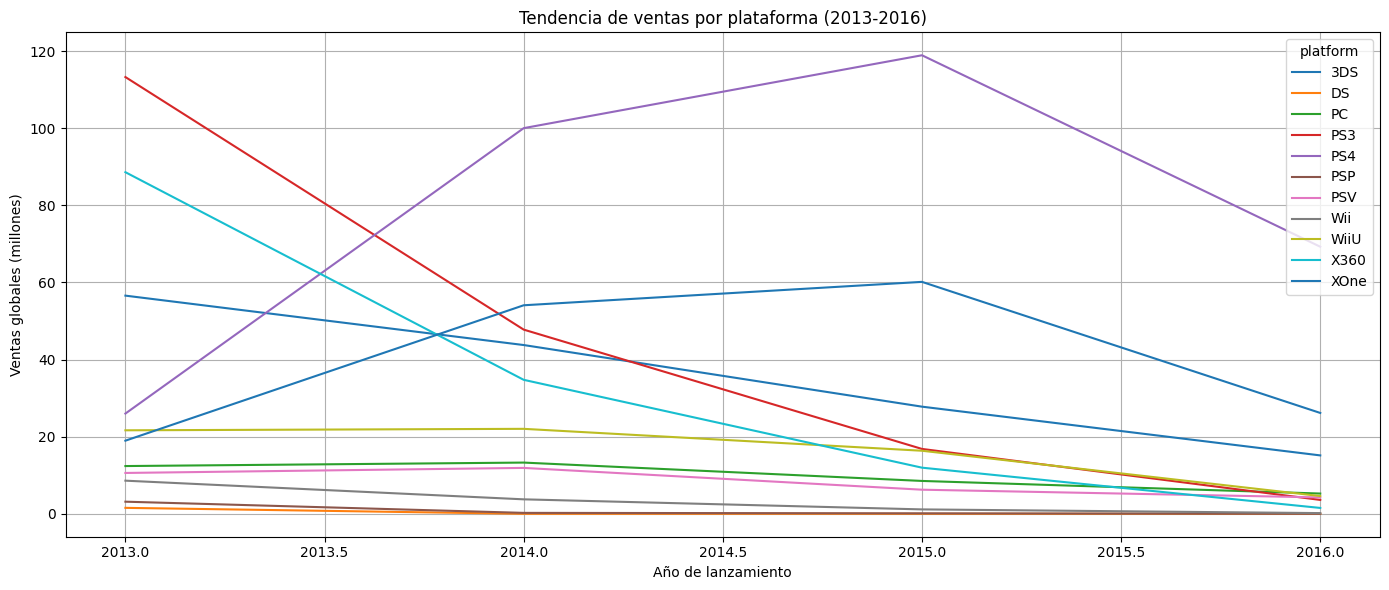

In [10]:
# ¿Qué plataformas son líderes en ventas? 
# ¿Cuáles crecen y cuáles se reducen?

# Filtramos solo los datos de los años más recientes para proyectar hacia 2017
recent_games = games[games['year_of_release'] >= 2013]

# Agrupamos por año y plataforma, y sumamos las ventas totales
platform_trends = recent_games.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)

# Visualizamos la evolución de las ventas por plataforma
platform_trends.plot(kind='line', figsize=(14, 6), title='Tendencia de ventas por plataforma (2013-2016)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

Hallazgos:
	•	La PS4 domina el periodo reciente con una fuerte tendencia al alza, alcanzando su punto máximo en 2015 y luego bajando ligeramente en 2016, manteniéndose como la plataforma con mejor desempeño.
	•	XOne también muestra una tendencia ascendente moderada, aunque en niveles más bajos que PS4.
	•	Plataformas como PS3 y X360, que eran fuertes en años anteriores, experimentan una caída rápida, marcando el final de su ciclo de vida.
	•	Wii, DS, PSP y PSV presentan un descenso constante y marginal en ventas, confirmando su salida del mercado relevante.
	•	PC y 3DS mantienen cierta estabilidad, aunque sin grandes picos de crecimiento.

Conclusión:

Durante el periodo 2013–2016 se confirma un cambio generacional claro en la industria de videojuegos. PS4 y XOne emergen como las principales plataformas en crecimiento, desplazando progresivamente a consolas anteriores como PS3, X360 y Wii. Este comportamiento respalda que para proyectar tendencias de cara al 2017, la atención debe centrarse en consolas recientes como PS4 y XOne, ya que representan la base activa del mercado en ese momento.

# 3.4 Diagrama de caja por plataforma

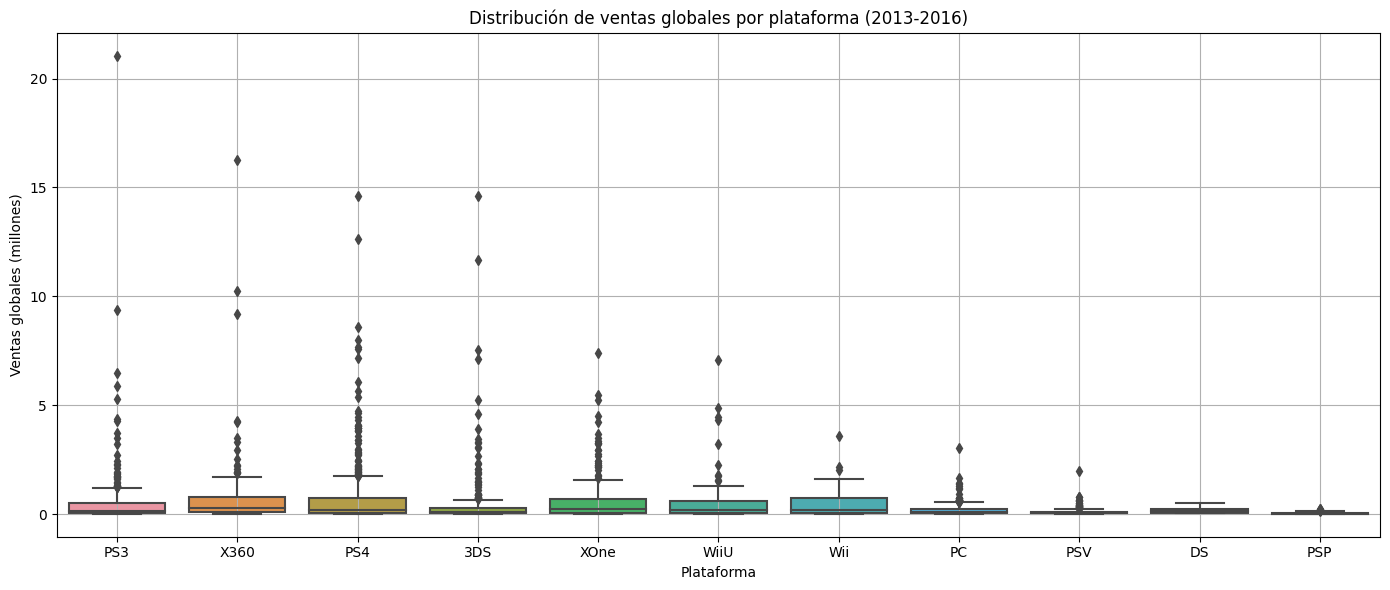

In [11]:
# Filtrar datos recientes (desde 2013)
recent_games = games[games['year_of_release'] >= 2013]

# Crear boxplot de ventas globales por plataforma
plt.figure(figsize=(14, 6))
sns.boxplot(x='platform', y='total_sales', data=recent_games)
plt.title('Distribución de ventas globales por plataforma (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

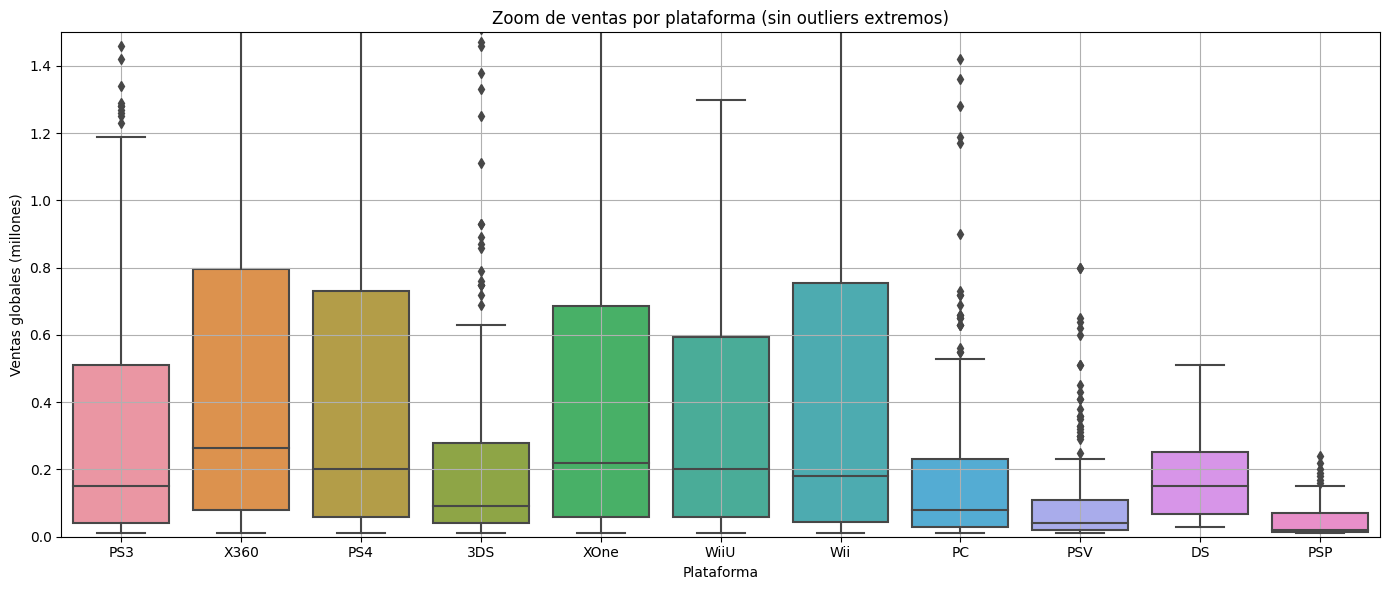

In [12]:
# Boxplot alternativo con límite en y para visualizar mejor la caja
plt.figure(figsize=(14, 6))
sns.boxplot(x='platform', y='total_sales', data=recent_games)
plt.ylim(0, 1.5)  # Límite para evitar los outliers grandes
plt.title('Zoom de ventas por plataforma (sin outliers extremos)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()

Hallazgos:
	•	El gráfico original (con outliers) muestra que PS3, X360 y PS4 tienen la mayor cantidad de valores extremos por arriba de los 10 millones, lo que indica que algunos juegos vendieron de forma muy destacada en estas plataformas.
	•	La PS4 destaca por su alta concentración de ventas con múltiples juegos en rangos elevados, lo que refuerza su rol como plataforma líder entre 2013 y 2016.
	•	En contraste, plataformas como PSV, DS, PSP y PC presentan cajas muy compactas, indicando que la mayoría de sus juegos tienen ventas bajas en ese periodo.

Hallazgos (Zoom sin outliers extremos):
	•	Al eliminar los valores atípicos, se logra observar con mayor claridad la mediana y dispersión de ventas por plataforma.
	•	X360, PS4 y Wii presentan una mayor mediana de ventas, lo que indica una buena consistencia de rendimiento comercial promedio.
	•	Aunque 3DS y PC no tienen valores muy altos, muestran cierta estabilidad en su rango intercuartílico, lo que podría representar una base de usuarios más constante pero con menor volumen de ventas.
	•	Plataformas como PSV, DS y PSP mantienen una distribución baja, lo que sugiere un menor impacto comercial en ese rango de años.

La inclusión del zoom sin outliers permite apreciar mejor la variabilidad real de cada consola, revelando que PS4 y X360 no solo destacan por sus ventas máximas, sino también por su buen rendimiento promedio. Esto refuerza la idea de que son plataformas clave para análisis proyectivos hacia 2017.

# 3.5 Gráfico de dispersión (Correlación entre reseñas y ventas)

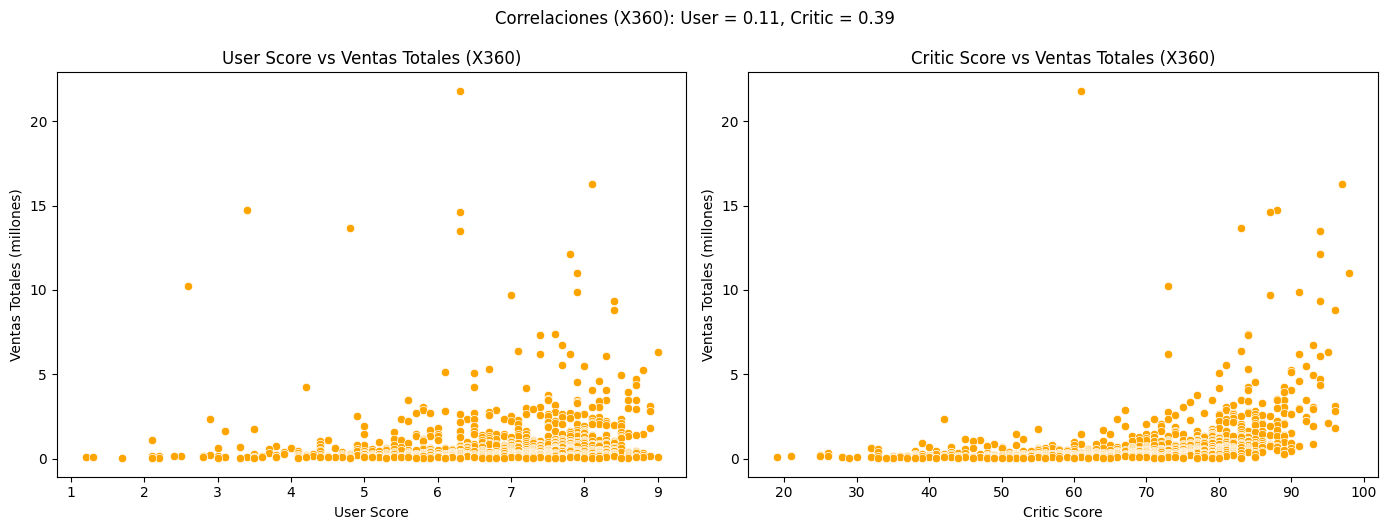

In [13]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (PS4)
# Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.

# Filtrar datos para X360 y remover valores nulos
x360_data = games[
    (games['platform'] == 'X360') & 
    (games['user_score'].notna()) & 
    (games['critic_score'].notna()) &
    (games['total_sales'].notna())
]

# Calcular correlaciones
corr_user = x360_data['user_score'].corr(x360_data['total_sales'])
corr_critic = x360_data['critic_score'].corr(x360_data['total_sales'])

# Graficar las relaciones
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=x360_data, x='user_score', y='total_sales', ax=axes[0], color='orange')
axes[0].set_title('User Score vs Ventas Totales (X360)')
axes[0].set_xlabel('User Score')
axes[0].set_ylabel('Ventas Totales (millones)')

sns.scatterplot(data=x360_data, x='critic_score', y='total_sales', ax=axes[1], color='orange')
axes[1].set_title('Critic Score vs Ventas Totales (X360)')
axes[1].set_xlabel('Critic Score')
axes[1].set_ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.suptitle(f"Correlaciones (X360): User = {corr_user:.2f}, Critic = {corr_critic:.2f}", y=1.05)
plt.show()

Hallazgos y conclusiones

•	Correlación entre User Score y ventas: 0.11 → muy baja. Esto sugiere que la calificación promedio de usuarios no influye fuertemente en las ventas de los juegos para X360.
•	Correlación entre Critic Score y ventas: 0.39 → moderada. Esto indica que las calificaciones de críticos tienen mayor impacto, aunque no son un predictor absoluto del éxito.
•	A nivel visual, ambas gráficas presentan una gran dispersión de puntos, lo cual confirma que las ventas dependen de más factores, como la estrategia de marketing, el reconocimiento de marca o exclusividades.

Las reseñas de críticos influyen ligeramente más que las de usuarios en las ventas de videojuegos para la plataforma X360. Sin embargo, en ambos casos, las correlaciones no son lo suficientemente altas como para ser decisivas, lo que indica que otros factores (como marketing, marca o disponibilidad) podrían jugar un papel más importante en la decisión de compra.     

# 3.6 Comparación ventas de mismo juego en otras plataformas

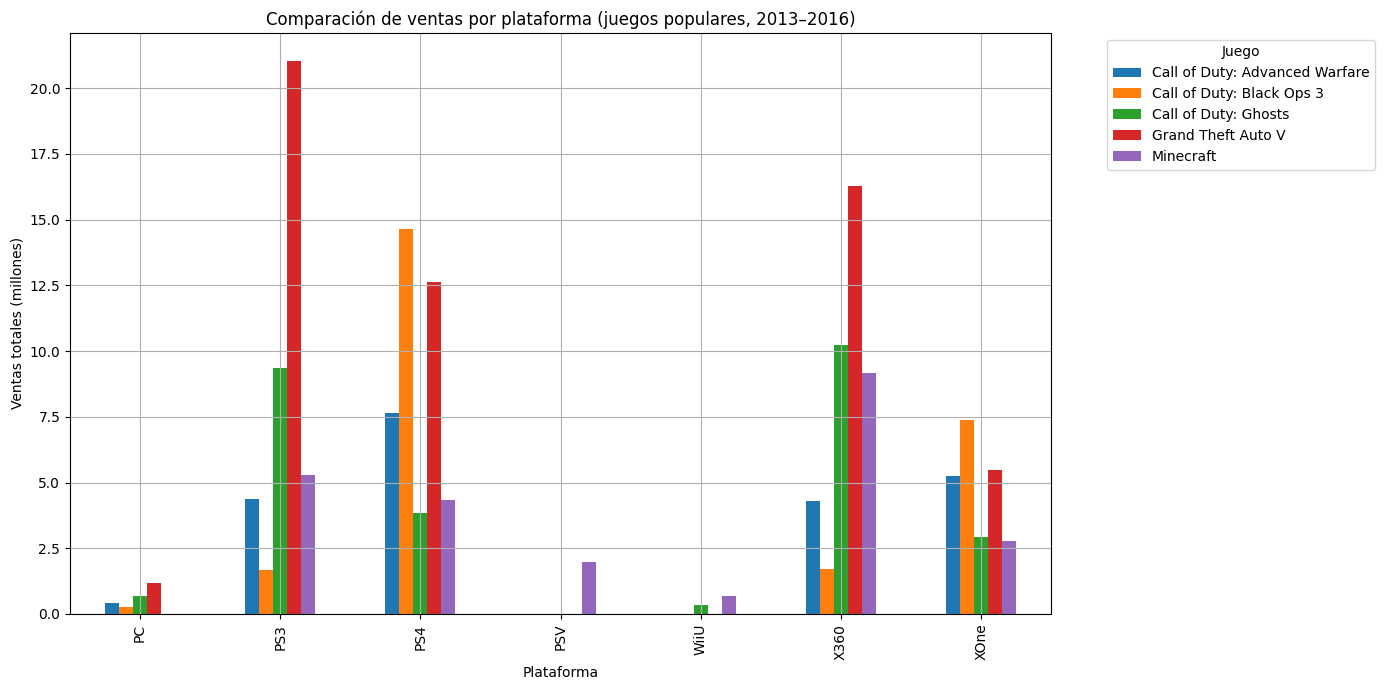

In [14]:
# Comparar las ventas de los mismos juegos en otras plataformas

# Filtrar juegos recientes (2013 en adelante) y multiplataforma
recent_games = games[games['year_of_release'] >= 2013]
duplicated_names = recent_games['name'][recent_games['name'].duplicated()].unique()
duplicated_games = recent_games[recent_games['name'].isin(duplicated_names)]

# Seleccionar juegos más vendidos en varias plataformas
top_titles = duplicated_games.groupby('name')['total_sales'].sum().sort_values(ascending=False).head(5).index
top_games = duplicated_games[duplicated_games['name'].isin(top_titles)]

# Crear tabla pivote
pivot = top_games.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum').fillna(0)

# Gráfico de barras por juego
pivot.T.plot(kind='bar', figsize=(14, 7))
plt.title('Comparación de ventas por plataforma (juegos populares, 2013–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (millones)')
plt.legend(title='Juego', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

Hallazgos:
	•	Se analizaron cinco juegos populares multiplataforma: Call of Duty: Advanced Warfare, Call of Duty: Black Ops 3, Call of Duty: Ghosts, Grand Theft Auto V y Minecraft.
	•	Grand Theft Auto V (GTA V) fue el título con mayores ventas en PS3, superando los 21 millones de unidades, y también tuvo buen rendimiento en X360 y PS4.
	•	Call of Duty: Black Ops 3 lideró en PS4, superando a las demás plataformas y consolidando a esta consola como una de las más efectivas para lanzamientos recientes.
	•	Minecraft, aunque con menor volumen comparado con GTA y CoD, mostró una alta penetración multiplataforma, vendiéndose en al menos seis plataformas distintas, lo que demuestra su adaptabilidad a diversos públicos.
	•	PSV y WiiU presentan muy poca o nula participación en ventas de estos títulos, lo que confirma su bajo impacto comercial en la distribución de juegos AAA durante este periodo.

Conclusion

La comparación específica por juego revela que títulos como GTA V y Black Ops 3 tienen un rendimiento significativamente mayor en consolas como PS3, PS4 y X360, lo que refuerza la importancia de estas plataformas para juegos de alto impacto comercial. Además, esta metodología permite observar qué plataformas son más rentables dependiendo del juego, lo cual es clave para decisiones de lanzamiento y proyección hacia 2017.

# 3.7 Distribución general de los juegos por género.

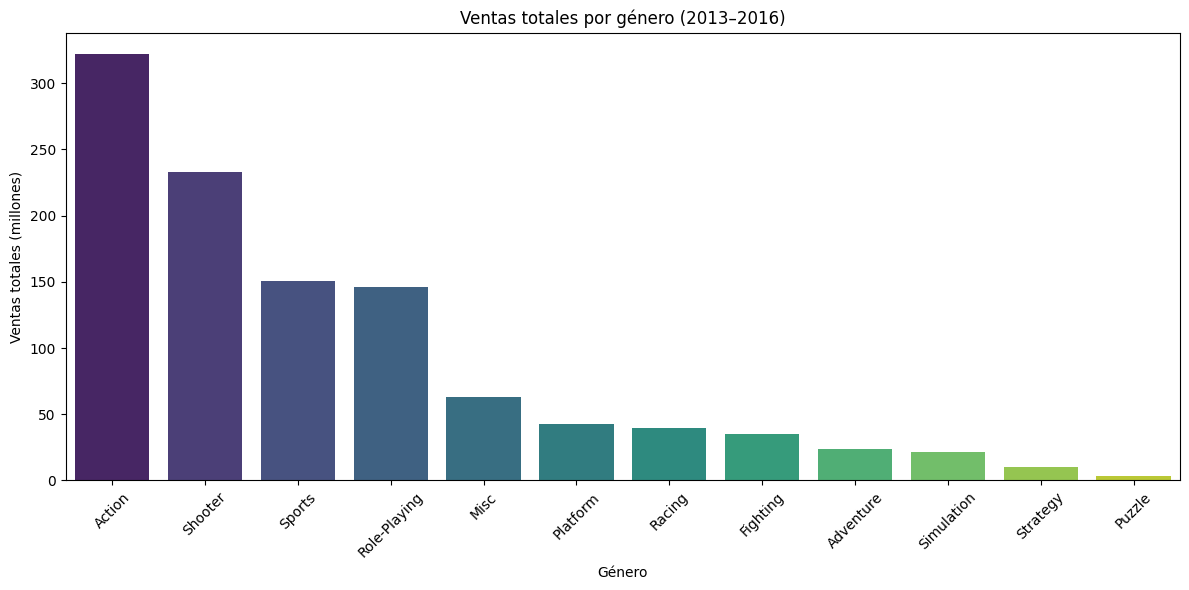

In [15]:
# ¿Qué se puede decir de los géneros más rentables?
# ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

# Agrupar datos recientes por género
genre_stats = recent_games.groupby('genre')['total_sales'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)

# Gráfico total de ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_stats.index, y=genre_stats['sum'], palette='viridis')
plt.title('Ventas totales por género (2013–2016)')
plt.xlabel('Género')
plt.ylabel('Ventas totales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

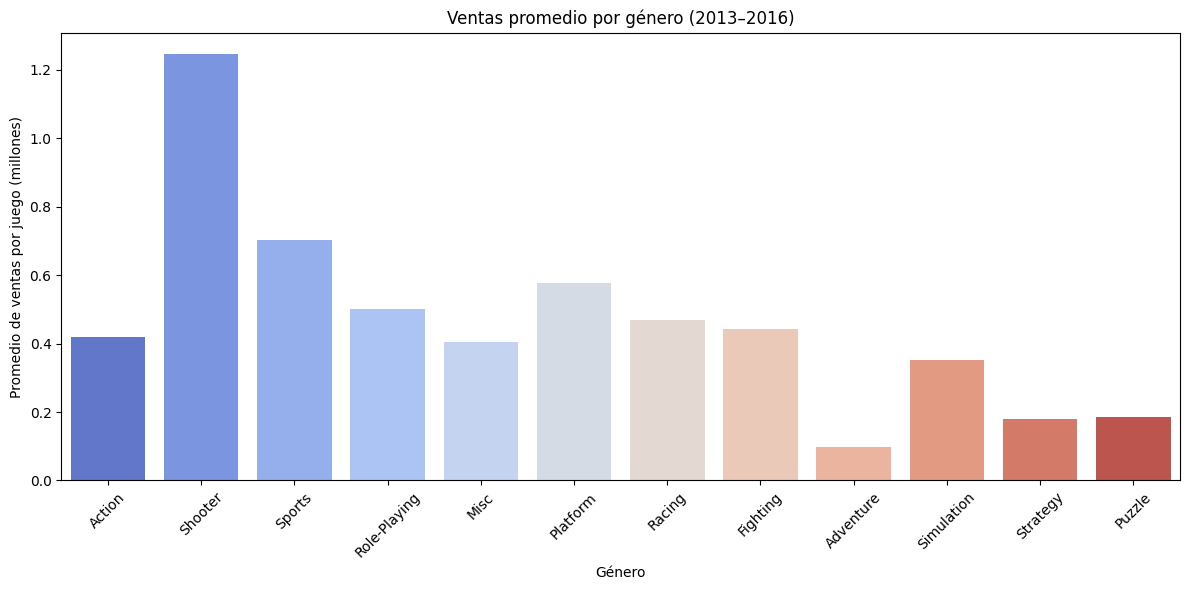

In [16]:
# Gráfico promedio de ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_stats.index, y=genre_stats['mean'], palette='coolwarm')
plt.title('Ventas promedio por género (2013–2016)')
plt.xlabel('Género')
plt.ylabel('Promedio de ventas por juego (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hallazgos y conclusiones:

¿Qué se puede decir de los géneros más rentables?
	•	Si analizamos por ventas totales, los géneros Action, Shooter y Sports lideran ampliamente, lo cual indica que estos géneros tienen un volumen muy alto de juegos vendidos, posicionándolos como los más rentables a gran escala.
	•	Sin embargo, al observar las ventas promedio por juego, el género Shooter se posiciona en primer lugar con una media de ventas significativamente más alta por título, lo que indica una mayor eficiencia comercial por lanzamiento. Le siguen géneros como Sports, Platform y X360, que también mantienen promedios altos.
	•	El género Action, aunque domina en ventas totales, presenta una media más baja, lo cual puede deberse a la gran cantidad de títulos en este género, diluyendo el promedio por juego.

¿Puedes generalizar acerca de los géneros con ventas altas y bajas?
	•	Los géneros con ventas altas tienden a ser aquellos con mayor dinamismo y competencia: Action, Shooter, y Sports. Estos géneros atraen audiencias amplias y suelen estar respaldados por franquicias reconocidas y campañas de marketing potentes.
	•	Los géneros con ventas bajas, tanto en totales como en promedio, son Puzzle, Strategy, Simulation y Adventure. Esto podría reflejar un nicho de mercado más limitado, menor inversión promocional o simplemente una menor cantidad de títulos exitosos.
	•	En resumen, los géneros con temáticas intensas y orientadas a la acción o el deporte tienden a ser los más rentables, mientras que los más orientados a la lógica, estrategia o simulación suelen tener un alcance más reducido.

## PASO 4: CRECIÓN DE UN PERFIL DE USUARIO PARA CADA REGIÓN (NA, UE, JP).

# 4.1 Las cinco plataformas principales por región

In [103]:
# Top 5 plataformas por región
top_platforms_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar resultados
print("Top 5 plataformas en Norteamérica:\n", top_platforms_na, "\n")
print("Top 5 plataformas en Europa:\n", top_platforms_eu, "\n")
print("Top 5 plataformas en Japón:\n", top_platforms_jp)

Top 5 plataformas en Norteamérica:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64 

Top 5 plataformas en Europa:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64 

Top 5 plataformas en Japón:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


Hallazgos:
	•	Norteamérica (NA):
Las plataformas más fuertes son X360, Wii, PS3, DS y PS2. Xbox 360 domina el mercado, lo cual indica una preferencia marcada por consolas de Microsoft.
	•	Europa (EU):
Aquí, PS3 y PS2 lideran, seguidas de cerca por Wii, X360 y DS. Sony tiene una presencia dominante, lo que sugiere una mayor fidelidad a PlayStation en esta región.
	•	Japón (JP):
La situación cambia radicalmente. DS y 3DS son las plataformas con más ventas, junto a PSP, PS3 y Wii. Hay una clara preferencia por consolas portátiles y por marcas japonesas (Nintendo y Sony).

CONCLUSIÓN:

Cada región muestra una fuerte inclinación por distintas marcas:
	•	NA: Xbox es muy fuerte.
	•	EU: PlayStation domina.
	•	JP: Nintendo lidera, sobre todo con portátiles.

Esto sugiere que las estrategias de mercado y desarrollo deben adaptarse regionalmente.

# 4.2 Los cinco géneros principales por región

In [104]:
# Top 5 géneros por región
top_genres_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar resultados
print("Top 5 géneros en Norteamérica:\n", top_genres_na, "\n")
print("Top 5 géneros en Europa:\n", top_genres_eu, "\n")
print("Top 5 géneros en Japón:\n", top_genres_jp)


Top 5 géneros en Norteamérica:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64 

Top 5 géneros en Europa:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64 

Top 5 géneros en Japón:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


Hallazgos:

•	Norteamérica (NA):
Los géneros más vendidos son Action, Shooter, Sports, Platform y Racing. El mercado favorece títulos dinámicos y competitivos.
•	Europa (EU):
Muy similar a NA, aunque aquí Shooter supera a Action, y Racing tiene más peso.
•	Japón (JP):
En contraste, el género Role-Playing es el más popular, seguido de Action, Puzzle, Fighting y Platform.

Conclusión:

•	NA y EU comparten gustos similares: prefieren acción, disparos y deportes.
•	JP tiene preferencias más orientadas a juegos narrativos, mentales y de combate cuerpo a cuerpo.
Esto indica que los desarrolladores deben considerar géneros distintos según el público objetivo. 

# 4.3 Efecto de las clasificaciones ESRB por región

In [105]:
# Clasificación ESRB más popular por región (ventas totales por clasificación)
rating_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Mostrar resultados
print("Ventas por clasificación ESRB en Norteamérica:\n", rating_na, "\n")
print("Ventas por clasificación ESRB en Europa:\n", rating_eu, "\n")
print("Ventas por clasificación ESRB en Japón:\n", rating_jp)

Ventas por clasificación ESRB en Norteamérica:
 rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64 

Ventas por clasificación ESRB en Europa:
 rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64 

Ventas por clasificación ESRB en Japón:
 rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


Hallazgos:
	•	Norteamérica (NA):
Las clasificaciones con más ventas son E (Everyone) y M (Mature). Esto sugiere que tanto juegos familiares como para adultos tienen una buena recepción.
	•	Europa (EU):
También predomina la clasificación E, seguida de M y T (Teen), mostrando una distribución similar a la de NA.
	•	Japón (JP):
En JP, una gran cantidad de juegos no tienen clasificación ESRB o son NaN (por la diferencia con los sistemas de clasificación locales como CERO). De los clasificados, E y T tienen una ligera ventaja.

Conlusión:

•	En NA y EU, las clasificaciones ESRB son útiles para predecir ventas (sobre todo E y M).
•	En JP, la ESRB no parece tener un gran impacto debido a diferencias culturales y uso de otro sistema de clasificación.

## PASO 5: Prueba de hipótesis

# Hipotesis 1

Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [78]:
XOne_scores = games[(games['platform'] == 'XOne') & (games['user_score'].notna())]['user_score']
pc_scores = games[(games['platform'] == 'PC') & (games['user_score'].notna())]['user_score']

In [85]:
# Prueba t de Student para medias independientes
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(XOne_scores, pc_scores, equal_var=False)

print(f"T-stat: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

T-stat: -4.653
P-value: 0.00000


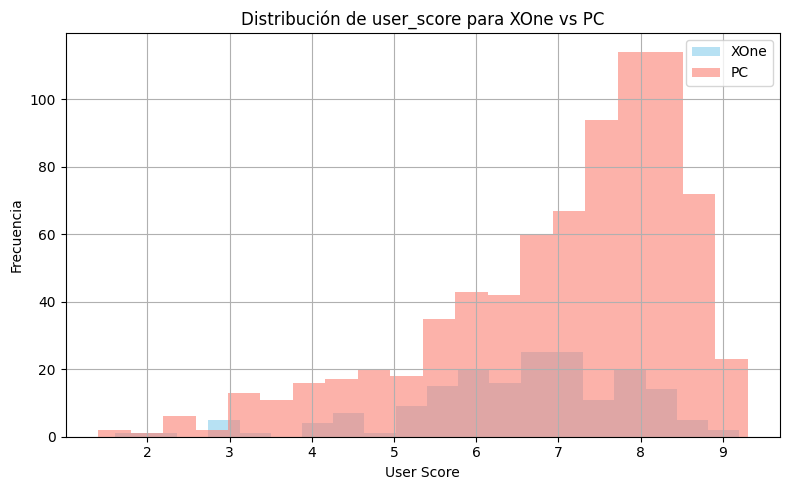

In [86]:
# Visualizar las distribuciones
plt.figure(figsize=(8, 5))
plt.hist(XOne_scores, bins=20, alpha=0.6, label='XOne', color='skyblue')
plt.hist(pc_scores, bins=20, alpha=0.6, label='PC', color='salmon')
plt.title('Distribución de user_score para XOne vs PC')
plt.xlabel('User Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hipotesis

•	Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para las plataformas XOne y PC son iguales.
•	Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para las plataformas XOne y PC son diferentes.
 
Se usó un valor alfa = 0.05 (nivel de significancia) y una prueba t de Student para muestras independientes, ya que se comparan las medias de dos grupos distintos.

#RESULTADOS
•	Estadístico T (t-stat): –4.653
•	Valor P (p-value): 0.00000

Al visualizar la distribución de las calificaciones (user_score):
•	PC muestra una distribución más concentrada entre 7 y 9, lo cual sugiere mayores valoraciones promedio.
•	XOne presenta una menor frecuencia y una dispersión más amplia, lo cual indica calificaciones más bajas y menos consistentes.

CONCLUSION:

-Dado que p-value < 0.05, se rechaza la hipótesis nula.
Hay una diferencia significativa en las calificaciones de los usuarios entre XOne y PC.
Los juegos de PC tienden a recibir mejores valoraciones promedio por parte de los usuarios en comparación con los de XOne.

# Hipotesis 2

PROMEDIO DE LOS USUARIOS PARA LOS GENEROS DE ACCION Y DEPORTES SON DIFERENTES.

In [106]:
action_scores = games[(games['genre'] == 'Action') & (games['user_score'].notna())]['user_score']
sports_scores = games[(games['genre'] == 'Sports') & (games['user_score'].notna())]['user_score']


In [107]:
# Prueba t de Student para medias independientes
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"T-stat: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")

T-stat: 1.577
P-value: 0.11484


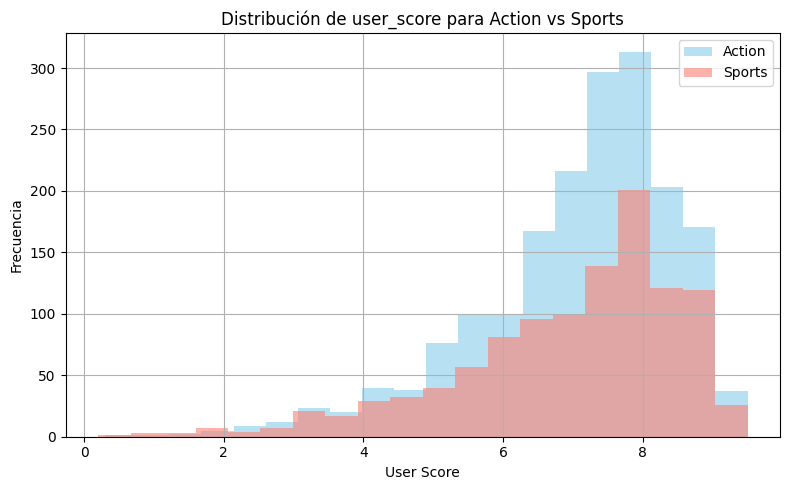

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(action_scores, bins=20, alpha=0.6, label='Action', color='skyblue')
plt.hist(sports_scores, bins=20, alpha=0.6, label='Sports', color='salmon')
plt.title('Distribución de user_score para Action vs Sports')
plt.xlabel('User Score')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Hipótesis

•	Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
•	Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Nivel de significancia utilizado: α = 0.05
Resultados de la prueba t:
	•	T-stat: 1.577
	•	P-value: 0.11484
Conclusión
Como el p-value (0.11484) es mayor al nivel de significancia α = 0.05, no se rechaza la hipótesis nula.

•	No hay suficiente evidencia estadística para afirmar que las calificaciones promedio entre los géneros Acción y Deportes sean diferentes.
•	A pesar de que pueden existir algunas variaciones visuales o en la distribución de datos, no son lo suficientemente consistentes como para considerarlas significativas a nivel estadístico.

# PASO 6: CONCLUSION GENERAL

Tras analizar el comportamiento del mercado de videojuegos entre 2013 y 2016, se identificaron patrones clave para tomar decisiones estratégicas en la industria:
	•	PS4 y XOne fueron las plataformas que mostraron un claro crecimiento durante este periodo, desplazando progresivamente a consolas como PS3, X360 y Wii, cuyas ventas y presencia disminuyeron notablemente.
	•	PS4 destacó como la consola con mejor rendimiento en ventas globales, tanto en volumen total como en ventas promedio por título, lo que la posiciona como una opción sólida para futuros lanzamientos.
	•	Los géneros más rentables en términos de volumen total fueron Action, Shooter y Sports; sin embargo, el género Shooter lideró en ventas promedio por juego, lo que lo convierte en un género de alto impacto comercial por título.
	•	Las reseñas de críticos influyeron más que las de usuarios en las ventas, aunque ambas correlaciones fueron bajas, lo que indica que factores externos como franquicia, marketing y disponibilidad juegan un rol más importante en el éxito comercial.
	•	La distribución de ventas entre plataformas para juegos multiplataforma mostró que títulos populares como GTA V o Black Ops 3 alcanzaron sus mayores cifras en PS4 y X360, reforzando su atractivo como plataformas prioritarias.
	•	A nivel de variabilidad de ventas por consola, eliminando outliers, se evidenció una mayor consistencia de ventas en consolas como PS4 y XOne, mientras que plataformas como PSV o DS presentaron menor estabilidad.

En conclusión:

Para planear el lanzamiento de un videojuego en 2017, conviene:
	•	Priorizar plataformas como PS4 y XOne por su rendimiento reciente.
	•	Apostar por géneros populares con alto impacto por juego como Shooter o Sports.
	•	Aprovechar el empuje de franquicias reconocidas y mantener relaciones con medios especializados para potenciar el éxito comercial.